In [5]:
import numpy as np
from fastplotlib import Image, GridPlot

/home/clewis7/repos/fastplotlib/fastplotlib/layouts.py:62: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if controllers == "sync":


RFBOutputContext()


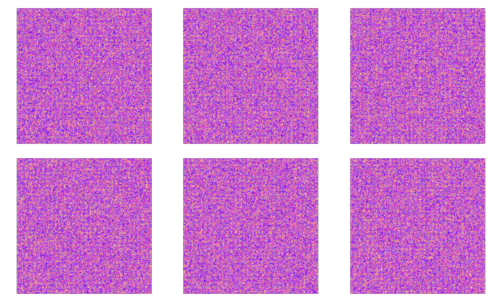

JupyterWgpuCanvas()

In [9]:
# grid with 2 rows and 3 columns
grid_shape = (2, 3)

# 2D view for all subplots in the grid
cameras = np.array(
    [
        ['2d', '2d', '2d'],
        ['2d', '2d', '2d']
    ]
)

# pan-zoom controllers for each view
# views are synced if they have the 
# same controller ID
controllers = np.array(
    [
        [0, 3, 1],  # id each controller with an integer
        [2, 2, 3]
    ]
)

# names for each subplot within the gridplot
names = np.array([["image1", "image2", "image3"],["image4", "image5", "image6"]])

# Create the grid plot
grid_plot = GridPlot(
    shape=grid_shape,
    cameras=cameras,
    controllers=controllers,
    names=names
)

image_graphics = list()

# Make a random image graphic for each subplot
for subplot in grid_plot:
    img = np.random.rand(512, 512) * 255
    ig = Image(data=img, vmin=0, vmax=255, cmap='gnuplot2', name="image")
    image_graphics.append(ig)
    
    subplot.add_graphic(ig)

# Define a function to update the image graphics 
# with new randomly generated data
def set_random_frame():
    for ig in image_graphics:
        new_data = np.random.rand(512, 512) * 255
        ig.update_data(data=new_data)

# add the animation
grid_plot.add_animations([set_random_frame])

grid_plot.show()

In [7]:
# can access subplot by name
grid_plot["image1"]

In [8]:
# can access subplot by index
grid_plot[0, 0]

In [10]:
# can access graphic directly via name
grid_plot["image1"]["image"]

In [11]:
grid_plot[0, 0]["image"]